In [33]:
# add the needed imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

In [100]:
# read the dataset
df = pd.read_csv("Trojan_Detection_dataset.csv")

# remove leading and trailing whitespaces from column names
df = df.rename(columns=lambda x: x.strip())

# list of protocol name where every index represents the protocol number
# protocol_names = ["HOPOPT", "ICMP", "IGMP", "GGP", "IPv4", "ST", "TCP", "CBT", "EGP", "IGP", "BBN-RCC-MON", "NVP-II", "PUP", "ARGUS (deprecated)", "EMCON", "XNET", "CHAOS", "UDP"]

# column_descriptions = {
#     "record_id": "represents the id of the record",
#     "Flow ID": "written as <source/destination ip> - <source/destination ip> - <destination/source port> - <destination/source port> - <protocol>.",
#     "Source IP": "IP address of source",
#     "Source Port": "Port number of source",
#     "Destination IP": "IP address of destination",
#     "Destination Port": "Port number of destination",
#     "Protocol": "name protocol used, refer to @protocol_names list",
#     "Timestamp": "digital record of the date and time when the frame transmitted",
#     "Flow Duration": "the time elapsed between receiving the first and last packets in the flow",
#     "Total Fwd Packets": ""
# }


# remove Timestamp, Flow ID, Class and record_id columns
labels = df['Class']
df = df.drop(columns=['Timestamp', 'Flow ID', 'Class', 'record_id'])


In [35]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()
# df["Flow Duration"].describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,...,177482.000000,177482.000000,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05
mean,38633.298729,5763.328969,8.295917,1.163310e+07,6.743929,9.908261,811.919496,1.023884e+04,230.168969,13.323571,...,1.673894,27.802025,1.421356e+05,2.047529e+04,1.617342e+05,1.264388e+05,4.540725e+06,4.024527e+05,4.894188e+06,4.234695e+06
std,18435.832044,15155.981517,4.540501,2.302798e+07,29.655515,106.401351,6055.745405,1.517666e+05,392.025958,67.749335,...,6.848561,6.652046,7.798898e+05,2.469821e+05,8.791481e+05,7.506803e+05,1.542957e+07,3.246955e+06,1.627581e+07,1.504980e+07
min,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34156.000000,80.000000,6.000000,4.690050e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43105.500000,443.000000,6.000000,4.854025e+05,2.000000,1.000000,31.000000,3.100000e+01,31.000000,0.000000,...,0.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52135.000000,443.000000,6.000000,1.062035e+07,5.000000,4.000000,451.000000,4.950000e+02,355.000000,21.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65530.000000,65267.000000,17.000000,1.199991e+08,4502.000000,12951.000000,846614.000000,1.868497e+07,1460.000000,1460.000000,...,586.000000,60.000000,3.059421e+07,1.993857e+07,4.902243e+07,3.059421e+07,1.197736e+08,7.445182e+07,1.197736e+08,1.197736e+08


In [36]:
# prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source IP                    177482 non-null  object 
 1   Source Port                  177482 non-null  int64  
 2   Destination IP               177482 non-null  object 
 3   Destination Port             177482 non-null  int64  
 4   Protocol                     177482 non-null  int64  
 5   Flow Duration                177482 non-null  int64  
 6   Total Fwd Packets            177482 non-null  int64  
 7   Total Backward Packets       177482 non-null  int64  
 8   Total Length of Fwd Packets  177482 non-null  int64  
 9   Total Length of Bwd Packets  177482 non-null  int64  
 10  Fwd Packet Length Max        177482 non-null  int64  
 11  Fwd Packet Length Min        177482 non-null  int64  
 12  Fwd Packet Length Mean       177482 non-null  float64
 13 

In [37]:
df.head(10)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,10.42.0.42,49975,121.14.255.84,80,6,10743584,4,4,372,672,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,10.42.0.42,49169,172.217.6.226,443,17,254217,6,7,3191,5246,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0
2,10.42.0.42,37749,10.42.0.1,53,17,1023244,1,1,30,179,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,10.42.0.42,41352,10.42.0.1,53,17,286483,1,1,40,106,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,10.42.0.151,44353,107.22.241.77,443,6,65633087,12,10,767,5622,...,3,32,322594.0,0.0,322594,322594,60306983.0,0.0,60306983,60306983
5,10.42.0.211,6021,10.42.0.1,53,17,251336,1,1,37,182,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
6,10.42.0.42,38871,74.217.63.24,443,6,3096,3,0,0,0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
7,10.42.0.42,49387,66.231.239.96,443,6,473,1,2,46,31,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
8,10.42.0.42,34743,10.42.0.1,53,17,557409,1,1,25,79,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
9,172.217.10.1,443,10.42.0.151,51786,6,314,2,0,55,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0


<Figure size 640x480 with 0 Axes>

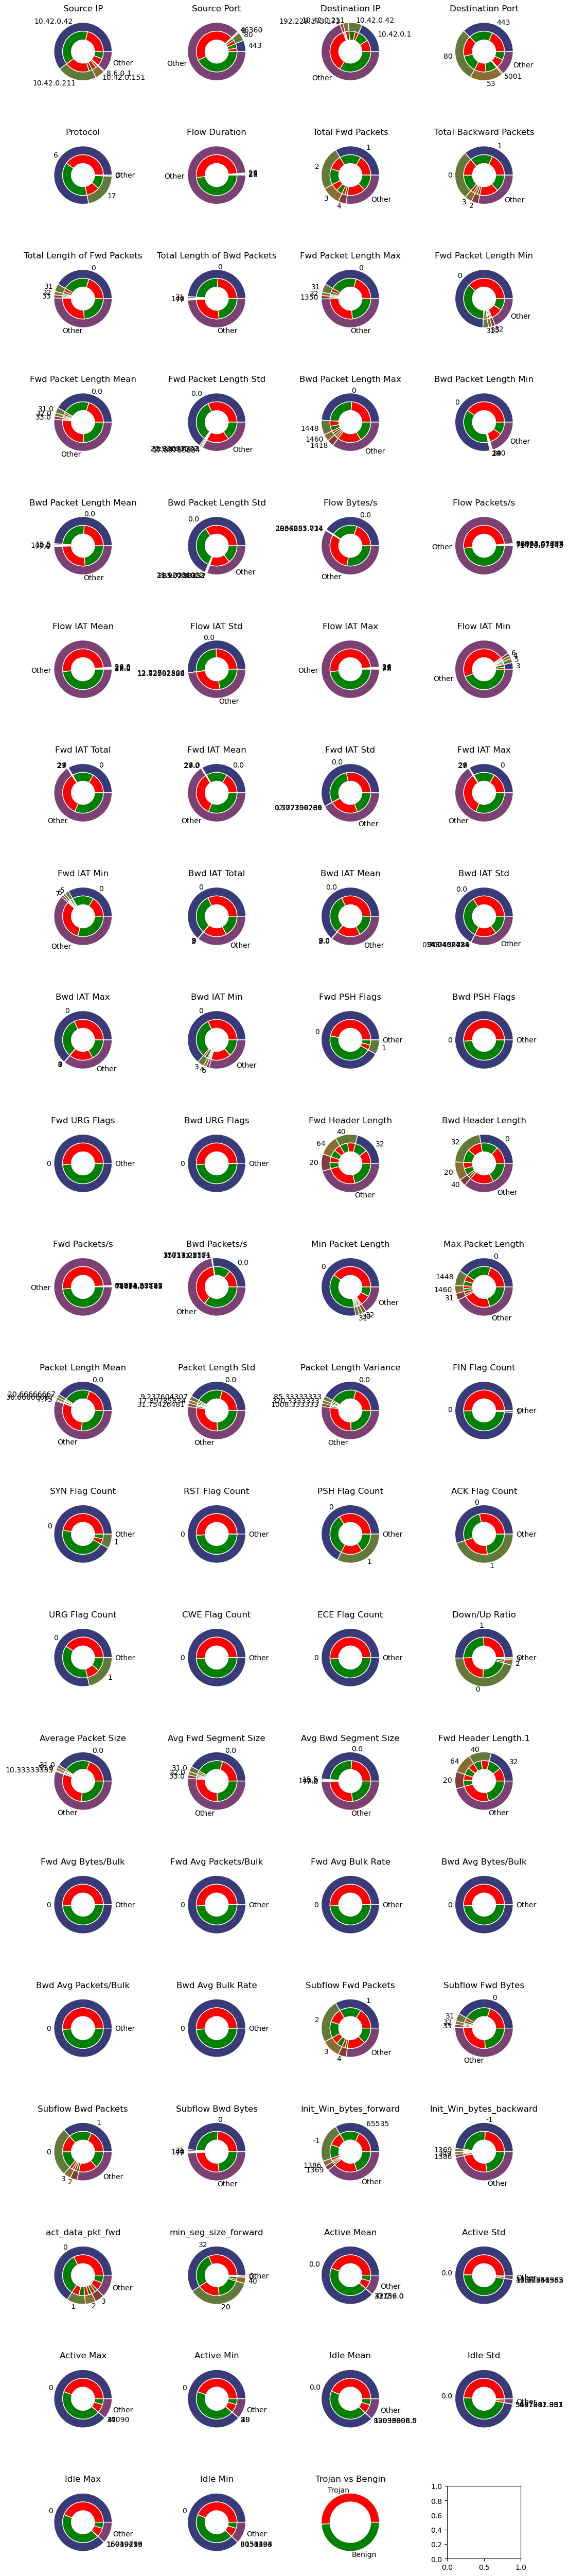

In [117]:
# get the total number of Trojan and benign classes
Trojan_total = labels.value_counts()[0]
Benign_total = labels.value_counts()[1]

# visualize features in pie chart manner
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
fig, ax = plt.subplots(21, 4, figsize=(10,50))
fig.tight_layout(h_pad=5, w_pad=5)

j = 0
for series_name, series in df.items():
    
#     print(f"{j//4}, {j%4}, {series_name}")
    
    # to handle the case when the number of unique values are less than 5
    largest_n_num = 4
    if len(series.value_counts()) <= largest_n_num:
        largest_n_num = len(series.value_counts())
    
    # get the largest IP addresses (default = 4)
    largest_4 = series.value_counts().nlargest(largest_n_num)
    # add fifth element which represents the other IP address
    largest_4.loc['Other'] = len(series)-sum(largest_4.values)  

    # plot 4 biggest values for each feature and how much every class resemble this feature
    cmap = plt.colormaps["tab20b"]
    outer_colors = cmap(np.arange(5)*4)
    inner_colors = cmap([1, 2, 5, 6, 9, 10, 14, 15, 18, 19])

    # count number of Trojans and Benigns for each value of the current feature
    vals = []
    Trojan_list = []
    Benign_list = []

    for i in range(0, largest_n_num):
        torjan_c = len(df.loc[(series==largest_4.index[i]) & (labels=="Trojan")])
        benign_c = len(df.loc[(series==largest_4.index[i]) & (labels=="Benign")])
        Trojan_list.append(torjan_c)
        Benign_list.append(benign_c)
        vals.append(torjan_c)
        vals.append(benign_c)


    # add the value for the others
    others_trojan = Trojan_total-sum(Trojan_list)
    others_benign = Benign_total-sum(Benign_list)
    vals.append(others_trojan)
    vals.append(others_benign)

    
    
    ax[j//4][j%4].set_title(series_name)
    ax[j//4][j%4].pie(largest_4.values, labels=largest_4.index, radius=1, colors=outer_colors,
           wedgeprops=dict(width=0.3, edgecolor='w'))
    
    # green is not trojan, red is trojan
    ax[j//4][j%4].pie(vals, radius=0.7, colors=["red", "green"],
           wedgeprops=dict(width=0.3, edgecolor='w'))
    
    # move to the next cell
    j += 1

# plot number of benign against trojan 
ax[j//4][j%4].set_title("Trojan vs Bengin")
ax[j//4][j%4].pie(labels.value_counts().values, labels=labels.value_counts().index, radius=1, colors=["red", "green"],
       wedgeprops=dict(width=0.3, edgecolor='w'))
    
plt.show()



In [118]:
# convert IP address into a number from the format(A.B.C.D) to (AAABBBCCCDDD)
def convertIP(IP_addr):
    IP_list = [int(x) for x in IP_addr.split(".")]
    IP_num = sum([x * (10**(3*(3-i))) for i, x in enumerate(IP_list)])
    return IP_num

# apply the conversion
df['Source IP'] = df['Source IP'].apply(convertIP)
df['Destination IP'] = df['Destination IP'].apply(convertIP)

df.head(5)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,10042000042,49975,121014255084,80,6,10743584,4,4,372,672,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,10042000042,49169,172217006226,443,17,254217,6,7,3191,5246,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0
2,10042000042,37749,10042000001,53,17,1023244,1,1,30,179,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,10042000042,41352,10042000001,53,17,286483,1,1,40,106,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,10042000151,44353,107022241077,443,6,65633087,12,10,767,5622,...,3,32,322594.0,0.0,322594,322594,60306983.0,0.0,60306983,60306983


In [119]:
# use zeroR, SVM, logistic regression, Adaboost

# ZeroR uses Zero Features to predict, what is does is just get the most frequent class in the dataset and then predict any
# test point to be that most frequent class
class ZeroR():
    
    def __init__(self, class_list):
        pass
    
